# Exploratory Data Analysis

In [652]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [653]:

df = pd.read_csv('updated_data.csv')

In [654]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    int64  
 15  Region       243 non-null    int64  
dtypes: float64(7), int64(9)
memory usage: 30.5 KB


In [656]:
# Removing column name 'A'
df=df.drop(['Unnamed: 0'], axis=1)

In [657]:
df.head().T

,0,1,2,3,4
day,1.0,2.0,3.0,4.0,5.0
month,6.0,6.0,6.0,6.0,6.0
year,2012.0,2012.0,2012.0,2012.0,2012.0
Temperature,29.0,29.0,26.0,25.0,27.0
RH,57.0,61.0,82.0,89.0,77.0
Ws,18.0,13.0,22.0,13.0,16.0
Rain,0.0,1.3,13.1,2.5,0.0
FFMC,65.7,64.4,47.1,28.6,64.8
DMC,3.4,4.1,2.5,1.3,3.0
DC,7.6,7.6,7.1,6.9,14.2


In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [659]:
# List out column names to check 
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [660]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,2.000000


In [661]:
df.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,2.000000


In [662]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

# Correlation

In [663]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<AxesSubplot:>

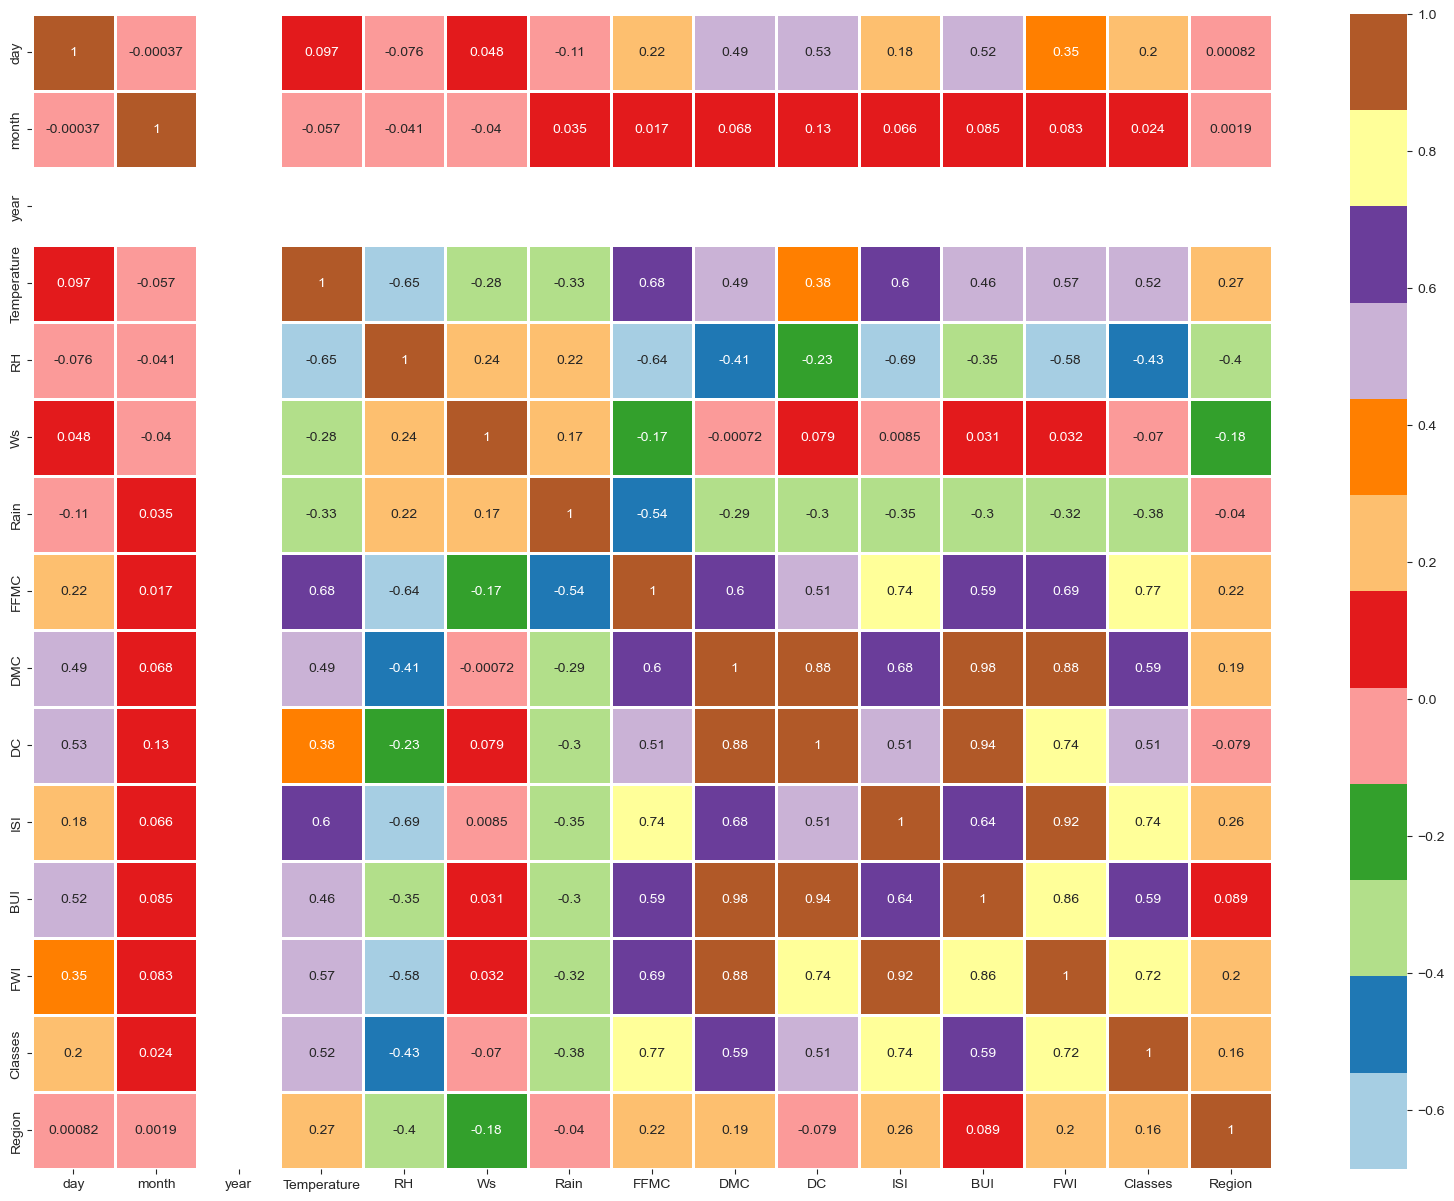

In [664]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, 
            cmap = "Paired",xticklabels="auto", yticklabels="auto")

In [665]:
df.shape

(243, 15)

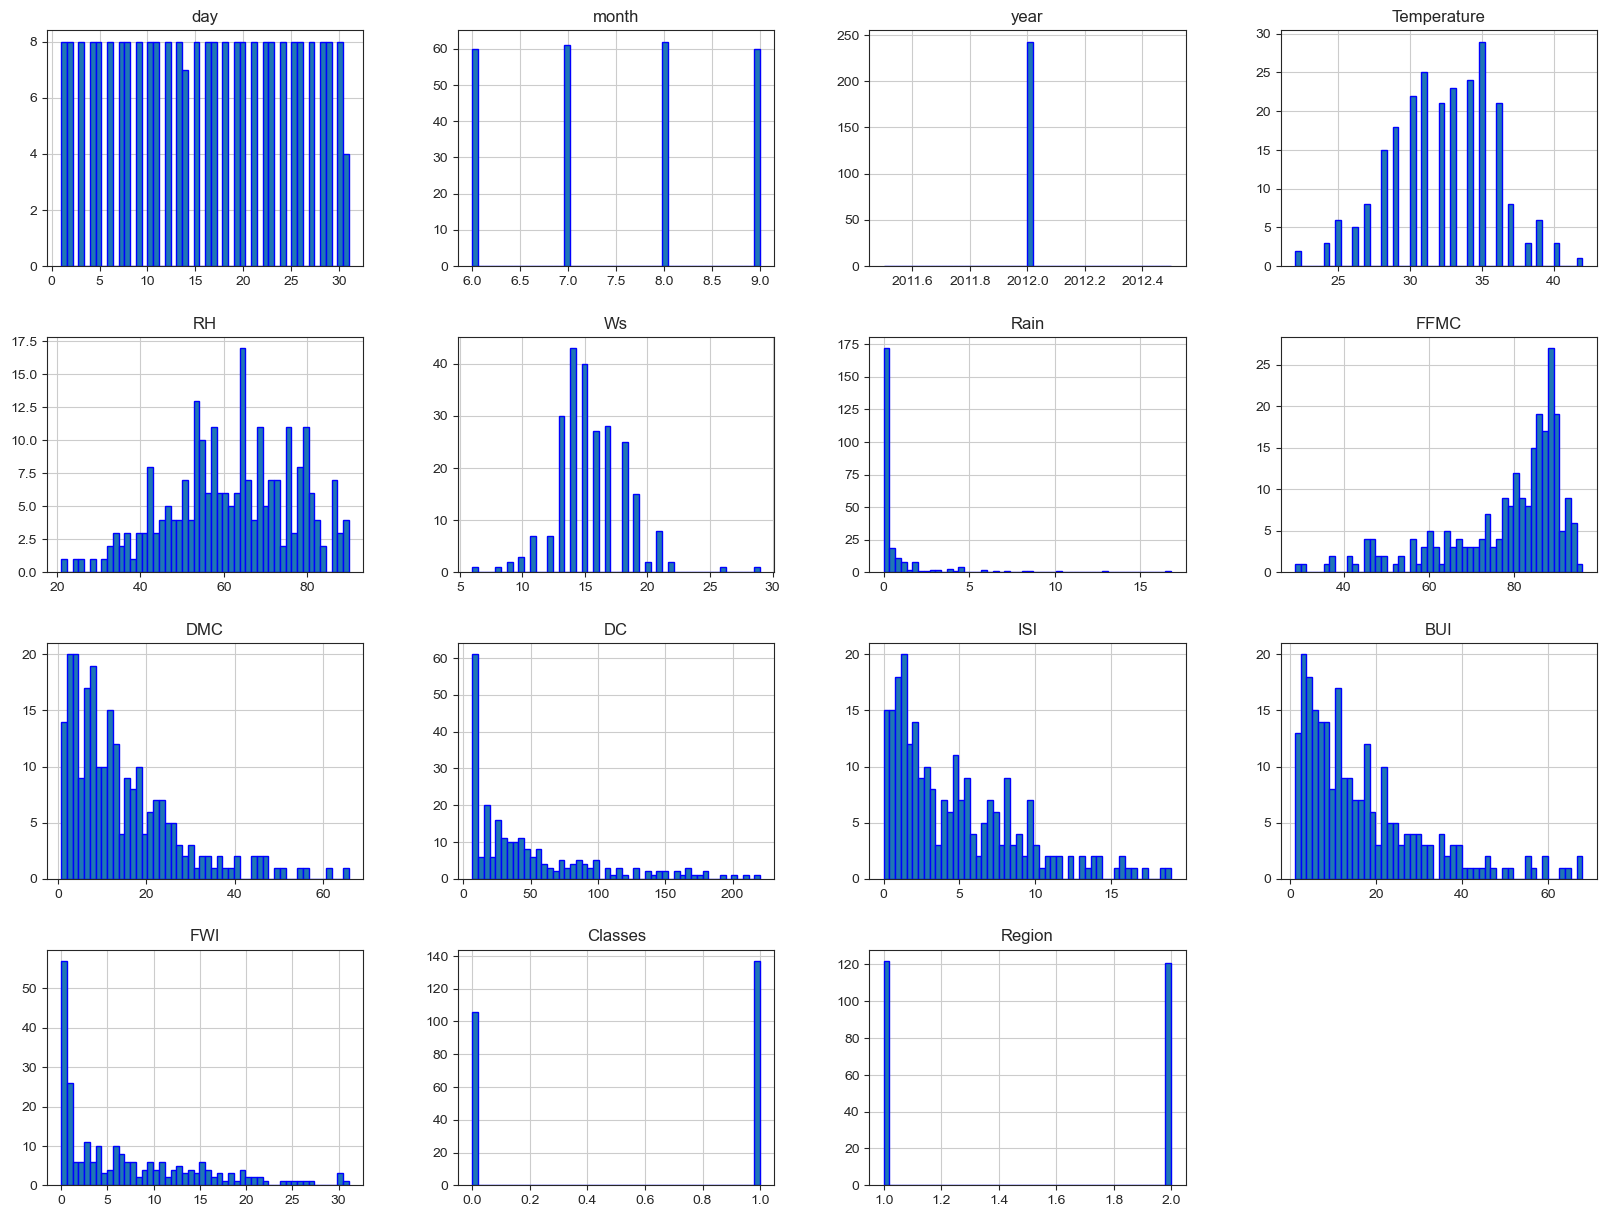

In [666]:
# PLot density plot for all features
#plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [667]:
# Percentage for PieChart
percentage = df.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

Since the dataset slighltly balanced so there is no need of reshampling 

/Users/abhijeetanand/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

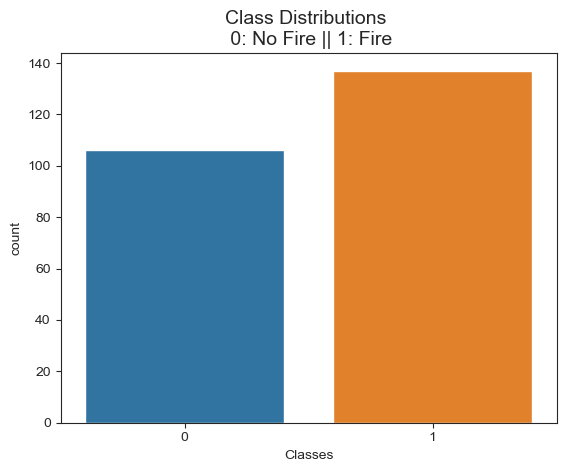

In [668]:
sns.countplot('Classes', data=df, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=14)

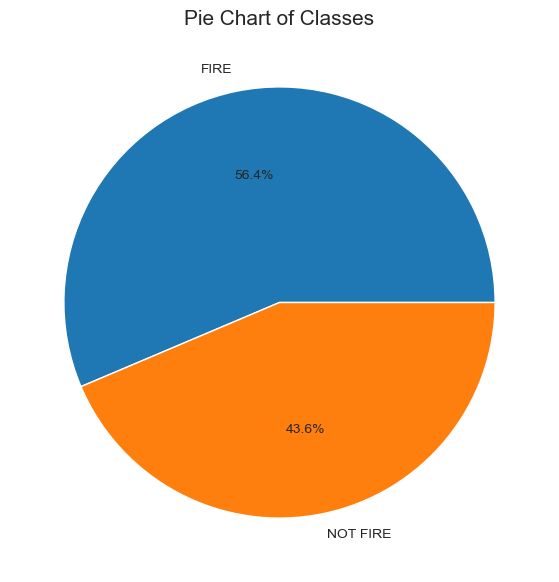

In [669]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

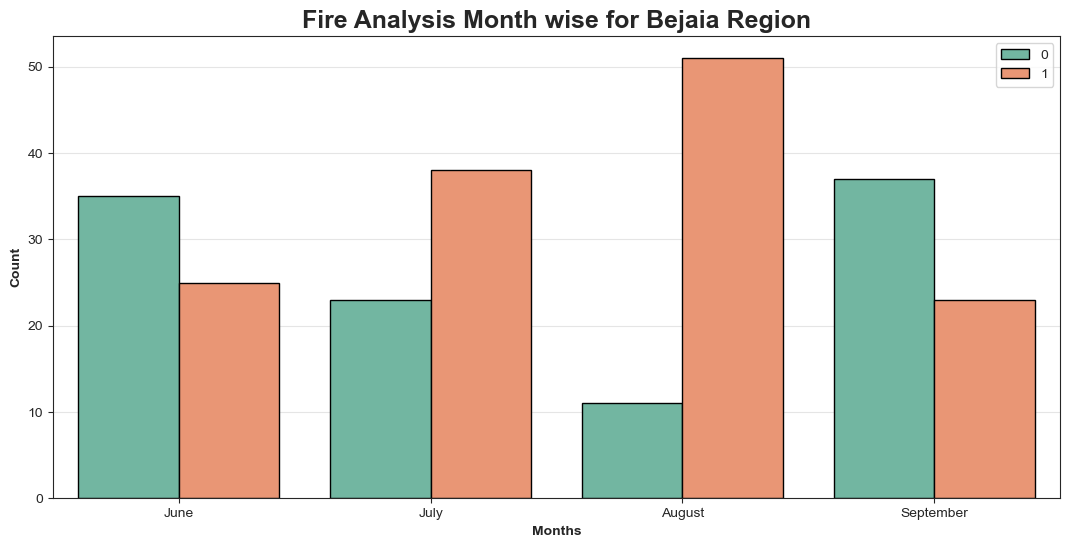

In [670]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

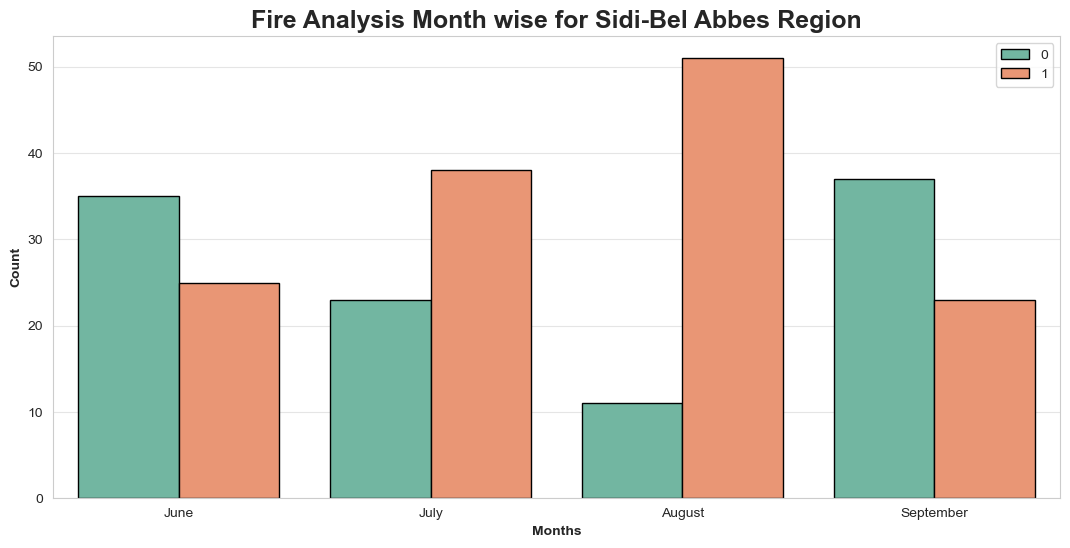

In [671]:
dftemp= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

# Checking Multicollinearity

In [672]:
x = df.iloc[:, 0:13]
y = df['Classes']

In [673]:
x.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [674]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int64

# Variation Inflation Factor for checking multicollinearity

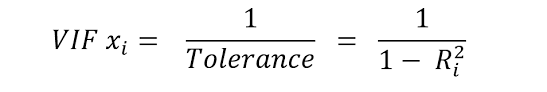


In [675]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)                        
     

        feature         VIF
0           day    1.487120
1         month    1.088510
2          year  514.359602
3   Temperature    2.415204
4            RH    2.764923
5            Ws    1.312931
6          Rain    1.551373
7          FFMC    4.120286
8           DMC   76.480443
9            DC   25.363045
10          ISI   23.122783
11          BUI  171.616713
12          FWI   40.471391


# Regression Analysis

In [676]:
# #Droping features ['day','month','year'] beacuse it is not important for analysis 
df1 = df.drop(['day','month','year'], axis=1)
df1.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


# Spliting the dataset into input and output feature for the regression analysis

In [677]:

X = df1.iloc[:,0:10]
y= df1['FWI']

In [678]:

X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [679]:

y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

# Spliting the dataset into train and test

In [680]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=0)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [681]:

X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [682]:

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.575406
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.594299
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,0.013239
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.326426
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.704563
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.882314
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.746551
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.918573
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.855633
FWI,0.575406,-0.594299,0.013239,-0.326426,0.704563,0.882314,0.746551,0.918573,0.855633,1.000000


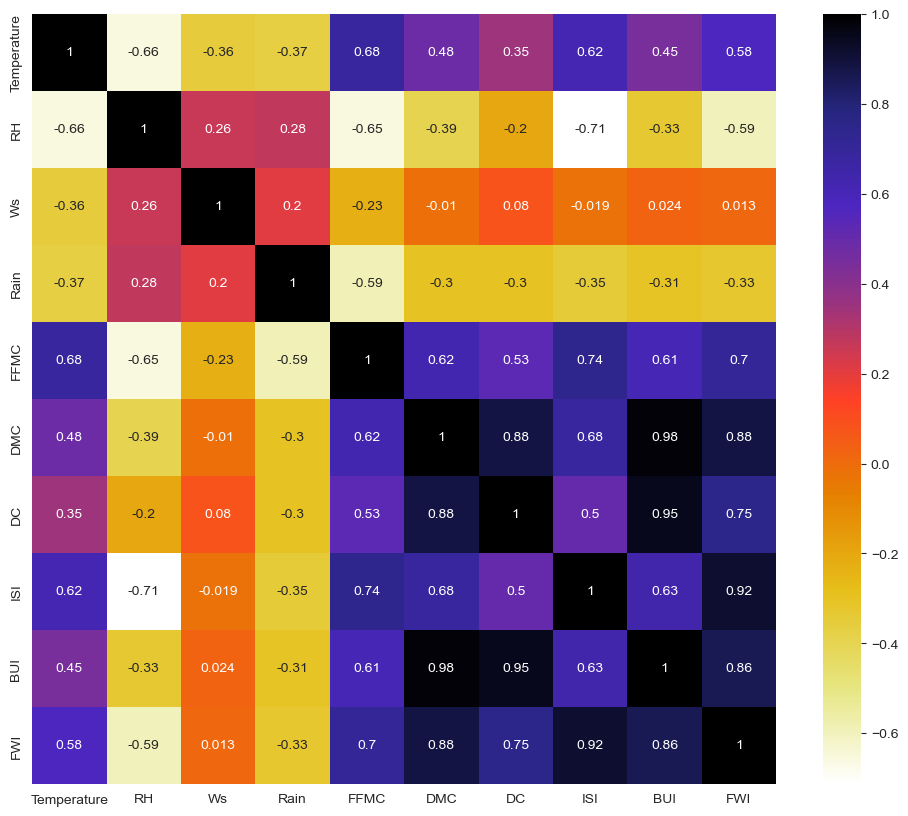

In [683]:

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Checking the correlation for independent features and the features having correlation more than 0.8 will remove from the analysis
def correlation(dataset, threshold):

In [684]:
# Checking the correlation for independent features and the features having correlation more than 0.8 will remove from the analysis
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
     

In [685]:

corr_features = correlation(X_train, 0.8)
corr_features


{'BUI', 'DC', 'FWI'}

In [686]:

# drop features which has correlation more than 0.8
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 7), (61, 7))

# Scalling

In [687]:

def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [688]:

X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)


Text(0.5, 1.0, 'X_train After Scaling')

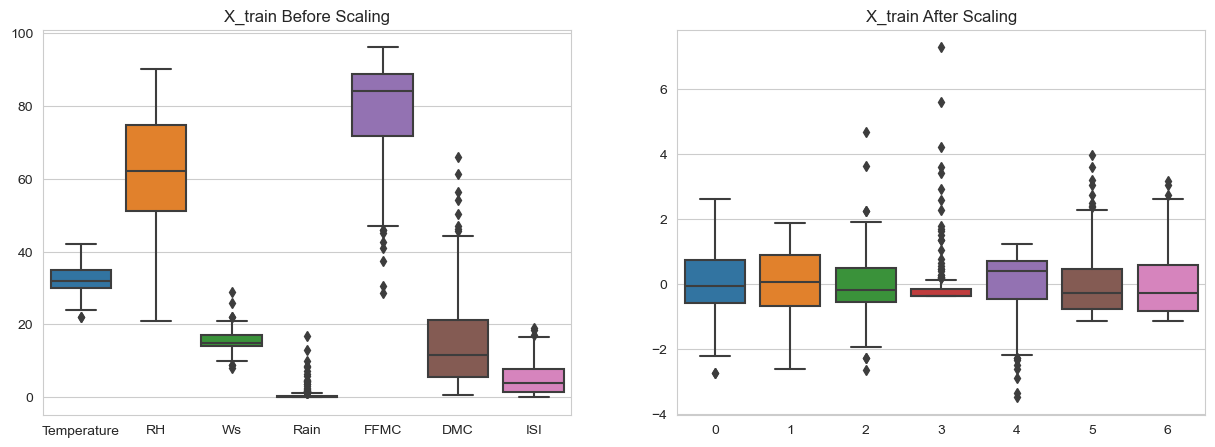

In [689]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Model Building For Regression Analysis

# Linear Regression

In [690]:

Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train_scaled, y_train)

LinearRegression()

In [691]:

print('Intercept is :',Linear_Regression.intercept_)
print('Coefficient is :',Linear_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [-0.0283721   0.04109337  0.09627506 -0.01655616 -0.54243749  3.84845037
  4.99255741]


In [692]:
print("Training Score:",Linear_Regression.score(X_train_scaled, y_train))
print("Test Score:",Linear_Regression.score(X_test_scaled,y_test))
     

Training Score: 0.9695395305921733
Test Score: 0.9649932926605853


In [693]:

Linear_Regression_predict = Linear_Regression.predict(X_test_scaled)
Linear_Regression_predict

array([ 9.41506683,  7.60634268,  7.68400501,  5.87306673,  7.3204071 ,
       11.34540494, -0.58473564,  9.31241843,  5.2947767 , 12.68860125,
        1.57139689, 13.2981353 ,  6.47490843, 15.26509949,  1.01152587,
        0.81120535,  2.27728471,  2.67422231,  3.83854169,  1.11119187,
       10.66495822,  5.58060473,  7.0466882 , -0.44199717,  2.3401461 ,
        3.44770367, 10.05834609,  0.34170617,  1.2083714 ,  1.86224714,
       13.40002748,  0.93449111, -0.67888196, 19.91564396,  3.89121169,
        0.90915613,  1.28882678, 18.86588672, 25.91576425,  2.47906687,
        6.97663212,  0.64561693, -0.86232546,  1.40590421,  0.37128199,
       -0.60182731,  3.94663026,  6.97440062, -0.70005406, 10.67146818,
        3.94007684, 10.12127919, -0.53012129,  1.44974711,  6.40213474,
        1.73573959, 11.15055467,  3.46597162,  3.61834924, 17.39712585,
        3.48274909])

In [694]:

Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Linear_Regression_predict})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.415067
150,7.2,7.606343
37,8.0,7.684005
75,6.3,5.873067
109,7.7,7.320407
...,...,...
179,10.9,11.150555
160,3.1,3.465972
159,3.0,3.618349
170,17.3,17.397126


In [695]:
meanAbErr = metrics.mean_absolute_error(y_test, Linear_Regression_predict)
meanSqErr = metrics.mean_squared_error(y_test, Linear_Regression_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Linear_Regression_predict))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.7123674928595751
Mean Square Error: 1.21523663052695
Root Mean Square Error: 1.1023777168135023


In [696]:

# To find coefficient of determination
r2 =  r2_score(y_test, Linear_Regression_predict)
print("R-Square:",r2)

R-Square: 0.9649932926605853


# Random Forest Regressor

In [697]:
from sklearn.ensemble import RandomForestRegressor

Random_Forest_Regressor = RandomForestRegressor()
Random_Forest_Regressor.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [698]:
Random_Forest_Regressor_prediction = Random_Forest_Regressor.predict(X_test_scaled)
Random_Forest_Regressor_prediction

array([1.0600e+01, 7.2820e+00, 7.7080e+00, 4.5490e+00, 8.1370e+00,
       1.2289e+01, 2.2000e-01, 9.2170e+00, 6.1720e+00, 1.3127e+01,
       1.5020e+00, 1.4178e+01, 6.5880e+00, 1.5636e+01, 6.9000e-01,
       1.9200e-01, 1.1800e+00, 2.3360e+00, 5.2160e+00, 1.8300e-01,
       5.3200e+00, 6.1060e+00, 2.4380e+00, 2.1700e-01, 2.8350e+00,
       2.9120e+00, 1.0232e+01, 3.3300e-01, 1.3000e-01, 7.5300e-01,
       1.5317e+01, 4.0600e-01, 2.4600e-01, 2.2060e+01, 5.3020e+00,
       8.5200e-01, 9.2600e-01, 1.6099e+01, 2.7463e+01, 1.2770e+00,
       6.9480e+00, 7.5500e-01, 1.0800e-01, 1.8890e+00, 8.5300e-01,
       9.0000e-03, 3.3020e+00, 7.4320e+00, 1.2000e-02, 4.0350e+00,
       5.0050e+00, 1.0581e+01, 7.0000e-03, 2.4090e+00, 6.9080e+00,
       2.1250e+00, 1.2381e+01, 3.2450e+00, 3.3040e+00, 1.9634e+01,
       3.3660e+00])

In [699]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Random_Forest_Regressor_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,10.600
150,7.2,7.282
37,8.0,7.708
75,6.3,4.549
109,7.7,8.137
...,...,...
179,10.9,12.381
160,3.1,3.245
159,3.0,3.304
170,17.3,19.634


In [700]:
meanAbErr = metrics.mean_absolute_error(y_test, Random_Forest_Regressor_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Random_Forest_Regressor_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Random_Forest_Regressor_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.5615409836065568
Mean Square Error: 0.6567150491803274
Root Mean Square Error: 0.8103795710531747


In [701]:
# To find coefficient of determination
r2 =  r2_score(y_test, Random_Forest_Regressor_prediction)
print("R-Square:",r2)

R-Square: 0.9810823415337008


### **Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| Random Forest Regressor     | 98.23 % |
| Linear Regression  | 96.50 % |


# **Hyperparameter Tuning**

**Tuning Random Forest Regressor**

In [702]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

Random_Forest_Regressor = RandomForestRegressor()
Random_rf = RandomizedSearchCV(Random_Forest_Regressor,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [703]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
bestrf_pred

array([1.0479e+01, 7.1410e+00, 7.4840e+00, 4.4750e+00, 8.3820e+00,
       1.2233e+01, 2.3200e-01, 9.1610e+00, 6.2580e+00, 1.3043e+01,
       1.6320e+00, 1.4114e+01, 6.3320e+00, 1.5653e+01, 7.0000e-01,
       2.2500e-01, 1.2490e+00, 2.3290e+00, 5.2820e+00, 2.1900e-01,
       5.3450e+00, 6.1640e+00, 2.5230e+00, 2.3100e-01, 2.7800e+00,
       2.8870e+00, 1.0271e+01, 3.4500e-01, 1.4900e-01, 7.0400e-01,
       1.5060e+01, 4.2300e-01, 2.7900e-01, 2.2227e+01, 5.1430e+00,
       8.3300e-01, 9.2600e-01, 1.5741e+01, 2.7698e+01, 1.2790e+00,
       6.9350e+00, 8.9400e-01, 1.2200e-01, 1.8170e+00, 8.3700e-01,
       5.0000e-03, 3.3260e+00, 7.0310e+00, 1.1000e-02, 4.0090e+00,
       5.0950e+00, 1.0486e+01, 7.0000e-03, 2.3100e+00, 6.8550e+00,
       2.2080e+00, 1.2158e+01, 3.1870e+00, 3.2610e+00, 1.9559e+01,
       3.2510e+00])

In [704]:
meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, bestrf_pred)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 0.565524590163934
Mean Square Error: 0.6581138196721302
Root Mean Square Error: 0.8112421461389504
R-Square: 0.9810420478591921


# **Feature Selection**

- In feature selection will be selecting only  important feature that will be important in order to make the prediction.



In [705]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
6,ISI,0.663444
4,FFMC,0.170349
5,DMC,0.152825
1,RH,0.005231
2,Ws,0.005228
0,Temperature,0.002544
3,Rain,0.000379


- Here the important feature are **ISI**, **FFMC**, **DMC**, **RH** and **Ws** that will used to make the prediction.

Text(0, 0.5, 'Features')

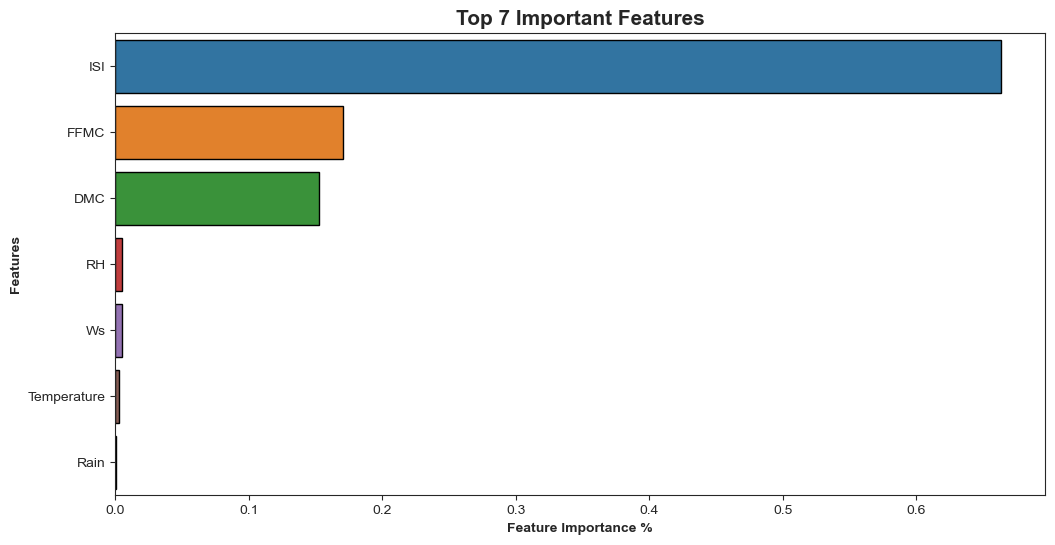

In [706]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 7 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

In [707]:
X_train_new = X_train.drop(['Rain', 'RH'], axis=1)
X_test_new = X_test.drop(['Rain', 'RH'], axis=1)

In [708]:
X_train_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [709]:
X_test_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [710]:
X_train_new_scaled, X_test_new_scaled = scaler_standard(X_train_new, X_test_new)

In [711]:
best_random_grid.fit(X_train_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(X_test_new_scaled)
bestrf_pred

array([1.0331e+01, 7.6560e+00, 7.2690e+00, 4.5980e+00, 8.1670e+00,
       1.2359e+01, 2.2700e-01, 9.3030e+00, 6.0940e+00, 1.2652e+01,
       1.4390e+00, 1.3971e+01, 6.7660e+00, 1.5777e+01, 6.1900e-01,
       1.8200e-01, 1.3140e+00, 2.3260e+00, 4.9490e+00, 1.7600e-01,
       5.3490e+00, 5.8180e+00, 2.3800e+00, 2.2900e-01, 2.8070e+00,
       2.9910e+00, 1.0085e+01, 3.2800e-01, 1.2800e-01, 6.8100e-01,
       1.5279e+01, 4.0800e-01, 2.6300e-01, 2.2090e+01, 5.0670e+00,
       8.3200e-01, 8.3300e-01, 1.5992e+01, 2.8176e+01, 1.4130e+00,
       6.6600e+00, 7.9900e-01, 9.7000e-02, 1.8590e+00, 8.4500e-01,
       5.0000e-03, 3.2490e+00, 7.1760e+00, 1.0000e-02, 3.8810e+00,
       4.8310e+00, 1.0521e+01, 1.1000e-02, 2.3770e+00, 6.8400e+00,
       2.1560e+00, 1.1938e+01, 3.4030e+00, 3.3170e+00, 1.8928e+01,
       3.3890e+00])

In [712]:
meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, bestrf_pred)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 0.5481639344262286
Mean Square Error: 0.5968580327868844
Root Mean Square Error: 0.7725658760176276
R-Square: 0.9828066123485028


# **Classification**


In [713]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [714]:

df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [715]:

X = df1.iloc[:, 0:10]
y = df1['Classes']

In [716]:
X.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [717]:

y.head(10)
     

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int64

In [718]:

# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape
     

((170, 10), (73, 10))

In [719]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [720]:

corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

In [721]:

X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 7), (73, 7))

In [722]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)


**Decision Tree**

In [723]:
from sklearn.linear_model import LogisticRegression


LogisticRegression_Classifier = LogisticRegression()
LogisticRegression_Classifier.fit(X_train, y_train)

/Users/abhijeetanand/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [724]:
LogisticRegression_Classifier_prediction = LogisticRegression_Classifier.predict(X_test)

In [725]:
Actual_predicted = pd.DataFrame({'Actual Class': y_test, 'Predicted Class': LogisticRegression_Classifier_prediction})    
Actual_predicted

,Actual Class,Predicted Class
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
...,...,...
89,1,1
212,1,1
74,1,1
4,0,0


In [726]:
Score = accuracy_score(y_test,LogisticRegression_Classifier_prediction)
Classification_Report = classification_report(y_test,LogisticRegression_Classifier_prediction)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Logistic Regression
Accuracy Score value: 0.9315
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.88      0.94        43

    accuracy                           0.93        73
   macro avg       0.93      0.94      0.93        73
weighted avg       0.94      0.93      0.93        73



/Users/abhijeetanand/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


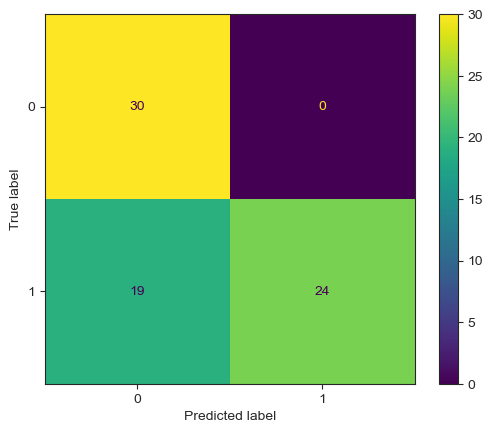

In [727]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(LogisticRegression_Classifier, X_test_scaled, y_test)
Logistic_Regression_Confusion_Matrix

**Decision Tree**

In [728]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [729]:
Decision_Tree_Classifier_prediction = Decision_Tree_Classifier.predict(X_test_scaled)
Decision_Tree_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [730]:
Actual_predicted = pd.DataFrame({'Actual Class': y_test, 'Predicted Class': Decision_Tree_Classifier_prediction})    
Actual_predicted

,Actual Class,Predicted Class
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
...,...,...
89,1,1
212,1,1
74,1,1
4,0,0


In [731]:
Score = accuracy_score(y_test,Decision_Tree_Classifier_prediction)
Classification_Report = classification_report(y_test,Decision_Tree_Classifier_prediction)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Decision Tree
Accuracy Score value: 0.9452
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.98      0.93      0.95        43

    accuracy                           0.95        73
   macro avg       0.94      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



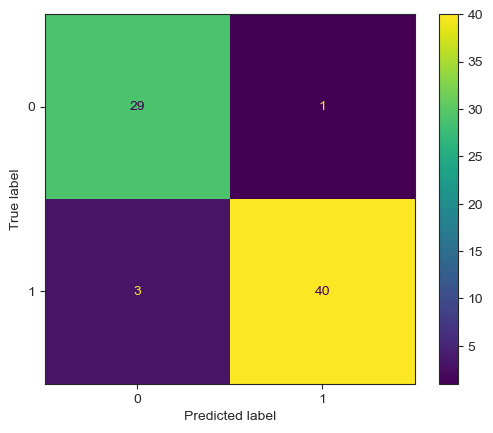

In [732]:
Decision_Tree_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Decision_Tree_Classifier, X_test_scaled, y_test)
Decision_Tree_Classifier_Confusion_Matrix

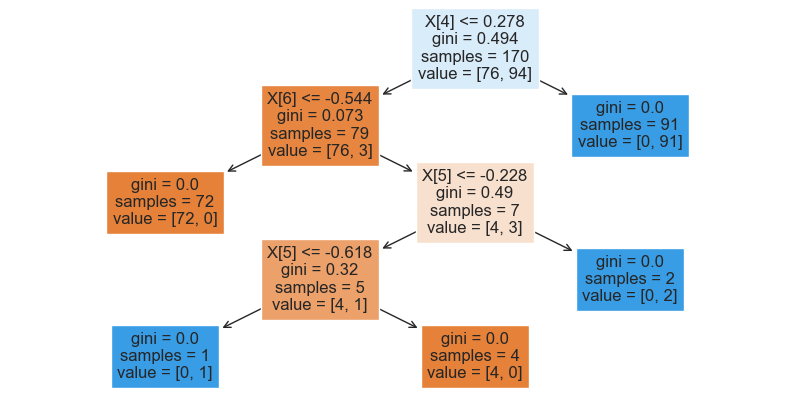

In [733]:
from sklearn import tree
plt.figure(figsize = (10,5))
tree.plot_tree(Decision_Tree_Classifier,filled = True)
plt.show()

**Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| Decision Tree Classifier  | 94.52 % |
| Logistic Regression Accurracy  | 93.15 % |

# **HyperParameter Tuning**

Random Forest classifier Tuning

In [734]:

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
Random_rf = RandomizedSearchCV(Random_Forest_Classifier, params, cv = 10,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train).best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=9, min_samples_split=6,
                       n_estimators=115)

In [735]:
Best_rf = Random_rf.best_estimator_
Best_rf.score(X_test_scaled,y_test)


0.9726027397260274

In [736]:
Bestrf_pred = Best_rf.predict(X_test_scaled)
Bestrf_pred


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [737]:

Actual_predicted = pd.DataFrame({'Actual Class': y_test, 'Predicted Class': Bestrf_pred})    
Actual_predicted

,Actual Class,Predicted Class
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
...,...,...
89,1,1
212,1,1
74,1,1
4,0,0


In [738]:

Score = accuracy_score(y_test, Bestrf_pred)
Classification_Report = classification_report(y_test,Bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)


FINAL Random Forest
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



In [739]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 0)
cv_rf=cross_val_score(Random_Forest_Classifier,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Random Forest {:.4f}'.format(cv_rf))


CV Score Random Forest 0.9710


**Accuracy score after Hypertunning Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| Random Forest Classifier  | 97.26 % |

| Models     | CV score  |
| ----------- | ----------- |
| Random Forest Classifier  | 0.9793 |
